In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Checking NUll values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#Drop unwanted columns
df = df.drop(columns=df.columns[2:5])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Checkimg the null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
#Rename the columns name
df.columns=['Category','Text']
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['spam'] = np.where(df['Category'] == 'spam', 1, 0)

In [9]:
def preprocess_data(text):
    # Clean punctuation, URLs, and so on
    text = clean_text(text)
    # Split the text into words
    words = text.split(' ')
    # Remove stopwords and stem words
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)


In [10]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [11]:
df['clean_text'] = df['Text'].apply(clean_text)
df.head()

,Category,Text,spam,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...


In [12]:
df.head()

,Category,Text,spam,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah i dont think he goes to usf he lives aroun...


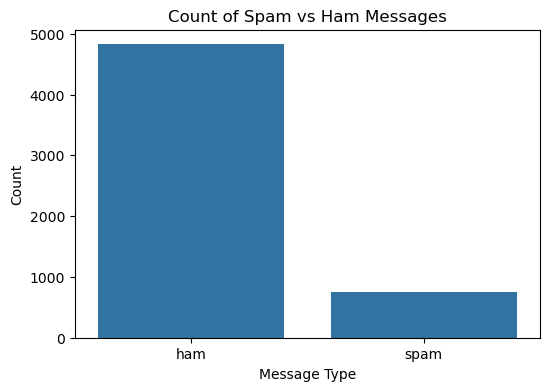

In [13]:
import seaborn as sns

# Count plot of spam vs ham
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df)
plt.title('Count of Spam vs Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


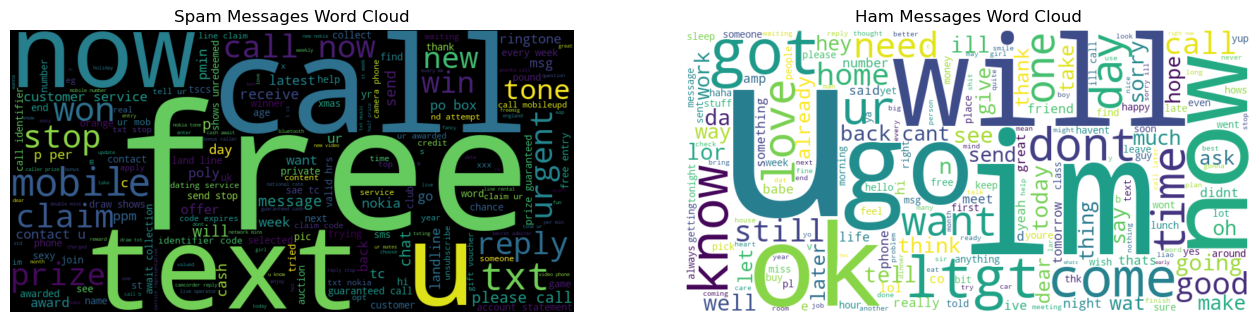

In [16]:
from wordcloud import WordCloud
spam_words = ' '.join(df[df['spam'] == 1]['clean_text'])
ham_words = ' '.join(df[df['spam'] == 0]['clean_text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.show()


In [17]:
X = df['Text']
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [18]:
print(len(X_train),len(X_test))

4457 1115


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_train_count =vect.fit_transform(X_train)
X_test_count= vect.transform(X_test)

In [20]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tf = tfidf_transformer.fit_transform(X_train_count)

In [22]:
X_train_tf

<4457x7657 sparse matrix of type '<class 'numpy.float64'>'
	with 59161 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

In [24]:
#Probability predictions
y_pred = nb.predict(X_test_count)


In [25]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9856502242152466
Confusion Matrix:
[[960   5]
 [ 11 139]]


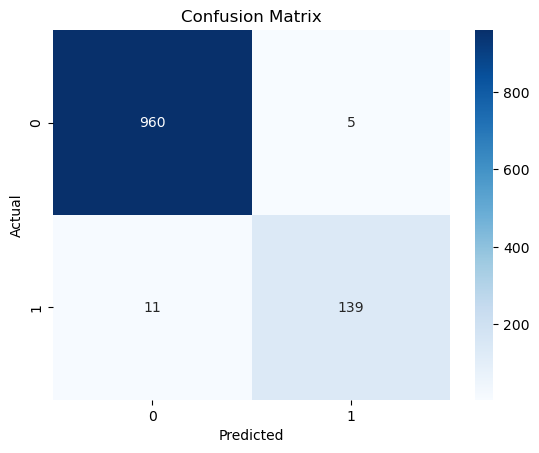

In [26]:
# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
df['clean_text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in a wkly comp to win fa cup final ...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the nd time we have tried contact u u ...
5568                    will b going to esplanade fr home
5569    pity was in mood for that soany other suggestions
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: clean_text, Length: 5572, dtype: object

In [28]:
# Example prediction
example_text = ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
example_text_clean = [clean_text(text) for text in example_text]
example_text_vectorized = vect.transform(example_text_clean)
print("Prediction for example text:", nb.predict(example_text_vectorized))

Prediction for example text: [0]
